In [4]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/porject')

In [ ]:
!pip install -r drive/MyDrive/Colab\ Notebooks/porject/requirements

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from help_functions import find_phone, find_contact, phone

In [8]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/porject/train.csv')
df_test = pd.read_csv('./drive/MyDrive/Colab Notebooks/porject/val.csv')

In [6]:
df.head()

,title,description,subcategory,category,price,region,city,datetime_submitted,is_bad
0,Диван-кровать,Продаем диван-кровать. Удобный механизм - евро...,Мебель и интерьер,Для дома и дачи,7000.0,Россия,Москва,2019-06-01 00:00:15.180656,0
1,Кожух рулевой колонки Даф хф 91 4509834,Кожух рулевой колонки DAF XF 94 (60066004)/\n ...,Запчасти и аксессуары,Транспорт,2290.0,Россия,Москва,2019-06-01 00:00:44.317933,0
2,Дешёвый буст аккаунтов Dota 4,! Буст аккаунтов с ммр выше 1000ммр не беру ! ...,Предложение услуг,Услуги,200.0,Северная Осетия,Владикавказ,2019-06-01 00:00:50.249692,1
3,Телевизор sharp.Смарт тв.Интернет,Продам телевизор . Диагональ 450.наличие входа...,Аудио и видео,Бытовая электроника,25000.0,Калининградская область,Советск,2019-06-01 00:00:50.325799,1
4,Открытка-конверт,Открытки-конверты ручной работы/\nВыполнены в ...,Коллекционирование,Хобби и отдых,150.0,Ставропольский край,Ессентукская,2019-06-01 00:00:56.632655,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984487 entries, 0 to 984486
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               984487 non-null  object 
 1   description         984487 non-null  object 
 2   subcategory         984487 non-null  object 
 3   category            984487 non-null  object 
 4   price               926439 non-null  float64
 5   region              984487 non-null  object 
 6   city                984487 non-null  object 
 7   datetime_submitted  984487 non-null  object 
 8   is_bad              984487 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 67.6+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16237 entries, 0 to 16236
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               16237 non-null  object 
 1   description         16237 non-null  object 
 2   subcategory         16237 non-null  object 
 3   category            16237 non-null  object 
 4   price               15374 non-null  float64
 5   region              16237 non-null  object 
 6   city                16237 non-null  object 
 7   datetime_submitted  16237 non-null  object 
 8   is_bad              16237 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB


# Check some statistics

In [ ]:
df['is_bad'].value_counts(normalize=True)

0    0.75798
1    0.24202
Name: is_bad, dtype: float64

In [ ]:
df['category'].value_counts(normalize=True)

Транспорт              0.212518
Личные вещи            0.202801
Бытовая электроника    0.154529
Для дома и дачи        0.134202
Недвижимость           0.102384
Хобби и отдых          0.065308
Услуги                 0.057574
Животные               0.031916
Работа                 0.026621
Для бизнеса            0.012146
Name: category, dtype: float64

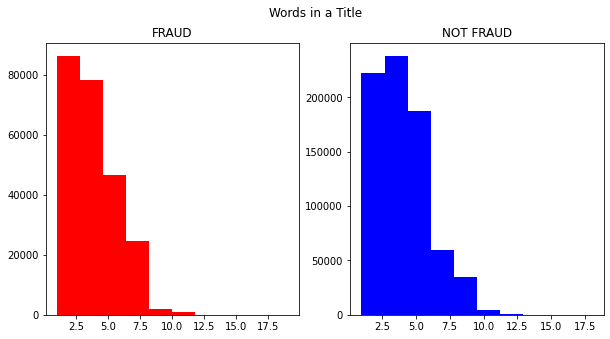

In [ ]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))

title_len=df[df['is_bad'] == 1]['title'].str.split().map(len)
ax1.hist(title_len, color='red')
ax1.set_title('FRAUD')

title_len=df[df['is_bad'] == 0]['title'].str.split().map(len)
ax2.hist(title_len, color='blue')
ax2.set_title('NOT FRAUD')

fig.suptitle('Words in a Title')
plt.show()

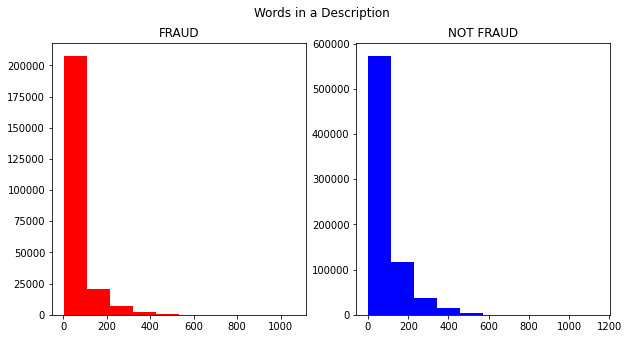

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

title_len=df[df['is_bad'] == 1]['description'].str.split().map(len)
ax1.hist(title_len, color='red')
ax1.set_title('FRAUD')

title_len=df[df['is_bad'] == 0]['description'].str.split().map(len)
ax2.hist(title_len, color='blue')
ax2.set_title('NOT FRAUD')

fig.suptitle('Words in a Description')
plt.show()

In [ ]:
word = df[df['is_bad'] == 1]['description'].str.split().apply(
    lambda x : [len(i) for i in x]
    )
t = word.map(lambda x: np.mean(x))

In [ ]:
t.quantile(.99)

12.11111111111111

In [ ]:
t[t < t.quantile(.95)]

2         4.894737
3         7.649123
5         4.750000
6         5.215686
12        5.818182
            ...   
984461    6.142857
984477    6.500000
984480    6.238095
984482    6.125000
984486    5.266667
Name: description, Length: 226349, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each Description')

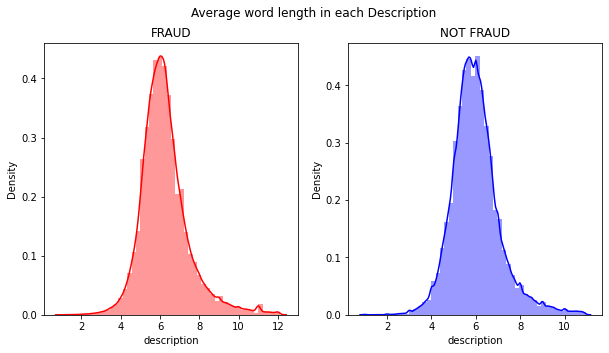

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(10, 5))

word = df[df['is_bad'] == 1]['description'].str.split().apply(
    lambda x : [len(i) for i in x]
    )
word = word.map(lambda x: np.mean(x))
word = word[word < word.quantile(.99)]
sns.distplot(word, ax=ax1, color='red')
ax1.set_title('FRAUD')

word = df[df['is_bad'] == 0]['description'].str.split().apply(
    lambda x : [len(i) for i in x]
    )
word = word.map(lambda x: np.mean(x))
word = word[word < word.quantile(.99)]
sns.distplot(word, ax=ax2, color='blue')
ax2.set_title('NOT FRAUD')

fig.suptitle('Average word length in each Description')

In [ ]:
df.groupby(['category'])['is_bad'].mean().sort_values(ascending=False)

category
Животные               0.546100
Услуги                 0.501579
Работа                 0.394536
Недвижимость           0.364042
Транспорт              0.261986
Для дома и дачи        0.227725
Хобби и отдых          0.162921
Для бизнеса            0.146262
Бытовая электроника    0.138104
Личные вещи            0.137783
Name: is_bad, dtype: float64

In [ ]:
df.groupby(['subcategory'])['is_bad'].mean().sort_values(ascending=False)

subcategory
Другие животные                 0.694338
Недвижимость за рубежом         0.624000
Гаражи и машиноместа            0.589781
Собаки                          0.580154
Мотоциклы и мототехника         0.574450
Дома, дачи, коттеджи            0.525496
Кошки                           0.518028
Резюме                          0.505310
Грузовики и спецтехника         0.503782
Предложение услуг               0.501579
Водный транспорт                0.494541
Билеты и путешествия            0.463942
Продукты питания                0.446054
Птицы                           0.427961
Комнаты                         0.426789
Автомобили                      0.409192
Земельные участки               0.314951
Квартиры                        0.314411
Готовый бизнес                  0.301404
Охота и рыбалка                 0.298013
Красота и здоровье              0.295192
Вакансии                        0.285606
Музыкальные инструменты         0.268565
Товары для животных             0.263663
Быто

In [ ]:
df.groupby(['is_bad'])['price'].mean()

is_bad
0    3.533491e+06
1    4.162576e+07
Name: price, dtype: float64

In [ ]:
df.groupby(['category', 'is_bad'])['price'].mean()

category             is_bad
Бытовая электроника  0         1.442813e+04
                     1         4.397163e+06
Для бизнеса          0         2.122456e+06
                     1         4.273084e+06
Для дома и дачи      0         1.372611e+04
                     1         6.108206e+07
Животные             0         8.747343e+03
                     1         2.019781e+08
Личные вещи          0         1.581593e+04
                     1         4.489665e+07
Недвижимость         0         5.351295e+06
                     1         2.728105e+07
Работа               0         1.533396e+06
                     1         2.408984e+07
Транспорт            0         8.527172e+05
                     1         8.400825e+06
Услуги               0         4.166723e+07
                     1         9.074280e+07
Хобби и отдых        0         1.963072e+07
                     1         1.054395e+06
Name: price, dtype: float64

In [ ]:
df['is_empty_price'] = df['price'].isna().astype('int64')

In [ ]:
df.groupby(['is_empty_price'])['is_bad'].mean()

is_empty_price
0    0.232253
1    0.397912
Name: is_bad, dtype: float64

In [ ]:
df.groupby(['category', 'is_empty_price'])['is_bad'].mean()

category             is_empty_price
Бытовая электроника  0                 0.139502
                     1                 0.097343
Для бизнеса          0                 0.142974
                     1                 0.183214
Для дома и дачи      0                 0.220318
                     1                 0.368254
Животные             0                 0.513929
                     1                 0.647815
Личные вещи          0                 0.135591
                     1                 0.243583
Недвижимость         0                 0.363845
                     1                 0.511111
Работа               0                 0.343398
                     1                 0.552710
Транспорт            0                 0.266137
                     1                 0.193876
Услуги               0                 0.464175
                     1                 0.642845
Хобби и отдых        0                 0.162986
                     1                 0.161747
Name

In [ ]:
df.groupby(['region'])['is_bad'].mean().sort_values(ascending=False)

region
Ингушетия                0.775730
Чеченская Республика     0.656644
Карачаево-Черкесия       0.631458
Чукотский АО             0.592593
Кабардино-Балкария       0.584974
                           ...   
Архангельская область    0.194917
Татарстан                0.184137
Москва                   0.181125
Россия                   0.153134
Кировская область        0.151506
Name: is_bad, Length: 85, dtype: float64

In [ ]:
df.groupby(['city'])['is_bad'].mean().sort_values(ascending=False)

city
Хилок            1.0
Ныроб            1.0
Староалейское    1.0
Чурапча          1.0
Кадый            1.0
                ... 
Пашия            0.0
Сазоново         0.0
Терней           0.0
Бабстово         0.0
Липовцы          0.0
Name: is_bad, Length: 3311, dtype: float64

In [9]:
df['month'] = pd.to_datetime(df['datetime_submitted']).dt.month
df['hour'] = pd.to_datetime(df['datetime_submitted']).dt.hour

In [10]:
df.groupby(['month'])['is_bad'].mean().sort_values(ascending=False)

month
7     0.257124
9     0.251630
10    0.237887
6     0.235689
8     0.226306
Name: is_bad, dtype: float64

In [11]:
df.groupby(['hour'])['is_bad'].mean()

hour
0     0.252938
1     0.192559
2     0.187268
3     0.199529
4     0.230546
5     0.213770
6     0.211987
7     0.211017
8     0.199319
9     0.220691
10    0.216146
11    0.225544
12    0.234907
13    0.230354
14    0.246603
15    0.240830
16    0.231726
17    0.249473
18    0.264137
19    0.281685
20    0.288796
21    0.284868
22    0.314754
23    0.296119
Name: is_bad, dtype: float64

# Check samples and confusion matrix of predictions

In [9]:
check_df = df.sample(10000)

In [10]:
check_df['is_phone'] = check_df['description'].apply(lambda x: find_phone(x))
check_df['phone'] = check_df['description'].apply(lambda x: phone(x))
check_df['is_contact'] = check_df['description'].apply(lambda x: find_contact(x))

In [11]:
check_df.groupby(['is_bad', 'is_phone']).count()['is_contact']

is_bad  is_phone
0       0           7031
        1            604
1       0            851
        1           1514
Name: is_contact, dtype: int64

In [12]:
check_df.groupby(['is_bad', 'is_contact']).count()['is_phone']

is_bad  is_contact
0       0             7535
        1              100
1       0             2272
        1               93
Name: is_phone, dtype: int64

In [13]:
check_df['is_fraud'] = check_df.apply(
    lambda x: 1 if (x['is_phone'] == 1) or (x['is_contact'] == 1) else 0, 
    axis=1)

In [14]:
check_df.groupby(['is_bad', 'is_fraud']).count()['is_contact']

is_bad  is_fraud
0       0           6949
        1            686
1       0            790
        1           1575
Name: is_contact, dtype: int64

In [17]:
pd.set_option('display.max_colwidth', None)

In [18]:
check_df[
    (check_df['is_bad'] == 0) & 
    (check_df['is_fraud'] == 1)
    ][['description', 'is_contact', 'is_phone', 'phone']]

,description,is_contact,is_phone,phone
681498,"срочно!!! /\nЭксклюзивный круглый столик. 9000р Сделан в единственном экземпляре, ручная работа, даёт мягкое освещение и шикарно смотрится в любом интерьере. Столешница - стекло, ножка - ствол дерева. Отличный подарок на новоселье или любителям эксклюзивных вещей. Стоил 42тыс/\nСтолик-поднос для завтрака в постель. 3400р Деревянный в отличном состоянии.",0,1,[9000423400]
120372,"Брежневка из инкерманского камня (зимой тепло, летом прохладно). Жилая 37.7 (47.5/45.8/42.2, смежно-изолированные), кухня 1.1. Санузел раздельный. Квартира светлая, уютная. Хорошее жилое состояние. Окна – половина - пластик,на всех - решетки. Окна зала и спальни выходят в маленький сад-детскую площадку (крымская сосна, сирень, розы (цветник), газон, морская галька, огорожено высокой рабицей (4 сотка), есть калитка на замке). Идеально для семьи с детьми. Есть персональный выход. Можно сделать пристройку. Газ, централизованная горячая вода, счетчики на воду, бойлер, централизованное отопление, домофон, инвертерный кондиционер Mitsubishi зима-лето, городской телефон, большой встроенный шкаф-купе./\nИнфраструктура образцовая: в двух шагах остановка транспорта (маршруты в центр и через весь город), супермаркет Novus, обновленный Воронцовский рынок, дом относится к хорошей гимназии, во дворе детский сад. Из окон видна действующая часовня и строящийся храм Св. Федора Ушакова. Знаменитый детский городок «Лукоморье» в трех минутах ходьбы. Один собственник, документы украинские и российский кадастр. Прямая продажа./\nНа номере вайбер (пишите, при надобности перезвоню на мобильный). /\nплюс три восемь ноль шестьдесят семь четыреста тридцать три пятьдесят девять семьдесят семь",1,1,[]
324586,"Актуатор двери Mitsubishi Pajero Sport (K9) пятой двери /\n/\nАртикул: MR402054/\n/\nБолее широкий ассортимент, можете ознакомится в нашем магазине /\nсм. ниже /\nВозможна доставка в регионы, любой транспортной компанией- /\n(ПЭК, Деловые Линии, CDEK, ФасТранс, Энергия, Почта России и т.д.) /\nЗапчасти не страховые /\nПрямые поставки распилов из Японии /\n/\nГарантия на запчасти от 7 до 56 дней /\n/\nВсе запчасти б/у оригинал",0,1,[9402054756]
862454,"Продвижение на Авито/\n👉Продвижение на авито и юле. Работаем только с бюджетами от 20 т.р. Звоните нам или оставляйте свой номер телефона в чате для обратного звонка, чтобы мы могли понят Вашу ситуацию и разработать стратегию продвижения индивидуально под Вас.✍/\n_________________________________/\n📊КОНКУРЕНТНАЯ РАЗВЕДКА/\n✅Расчет количества трафика для вашей ниши/\n✅Анализ объявлений конкурентов в Exel/\n✅Анализ прозвона конкурентов в Exel/\n✅Анализ работы с входящим трафиком (Апселы, кросселы, дозвон, скрипт продаж)/\n🤜Звоните прямо сейчас! Расскажем подробней!/\n_________________________________/\n👇ПУБЛИКАЦИЯ ОБЪЯВЛЕНИЙ/\n✅Заголовки по ключевым запросам/\n✅Шаблон описания с СЕО оптимизацией/\n✅Ежедневный отчет о проделанной работе/\n✅Фотографии во все доступные слоты/\n✅Публикация объявлений в разные районы города/\n✅Работа с тех. Поддержкой/\n✅Список ключевых запросов/\n✅Видео с вашим продуктом/\n⭐ Добавьте это объявление в Избранное, чтобы не потерять!/\n_________________________________/\n📂НАШИ УСЛУГИ/\n📌Создание объявлений на Авито/\n📌Оформление магазина на Авито/\n📌Конкурентная разведка/\n📌Создание объявлений на Юле/\n📨Пишите нам в WhatsApp, по СМС или через кнопку “Написать сообщение” С радостью ответим на все вопросы!)😘/\n/\nпродвижение +на авито авито продвижение объявления услуги продвижения +на авито продвижение сайтов авито маркетинг интернет маркетинг яндекс директ яндекс директ вход яндекс директ личный реклама +в яндекс директ объявления яндекс директ контекстная реклама контекстная реклама яндекс настройка контекстной рекламы настройка яндекс директ таргетированная реклама таргетировать рекламу таргетированная реклама +в инстаграм реклама вконтакте реклама сеть социальный реклама вконтакте цена бесплатная реклама рекламный агентство сайт продвижение кампания сео se

In [19]:
check_df[
    (check_df['is_bad'] == 1) & 
    (check_df['is_fraud'] == 0)
    ][['description', 'is_contact', 'is_phone', 'phone']]

,description,is_contact,is_phone,phone
491569,нечего8 не 9надо5 делать8 длина 4 2 метра звенит 0634545,0,0,[]
138880,"Добрый день всем!!!/\nУстановка, монтаж, обслуживание кондиционеров./\nДелаем по договору(ООО или ИП) , гарантия, всегда на связи, в любой момент подьедем./\nПроконсультируем. /\nОплата любая!!!/\nОперативность на всех этапах!!!/\nРемонтреутов.рф",0,0,[]
967845,"⚠️цена по распродаже⚠️/\n🚫старая цена7️⃣7️⃣0️⃣0️⃣₽🚫/\n📐размеры📐 27,28,29,60,65,62EUR/\n🔝Качество - оригинал❗/\n🔥светятся в темноте🔥/\n📦в регионы отправляю АВИТО-доставка✈или любой ТК🚛/\n🆓️по Екб доставка🛵 и примерка БЕСПЛАТНО!/\n⤴️ещё больше выбора в профиле⤴️/\n📧по всем вопросам пишите в личку📧",0,0,[9606562]
399465,В хорошем состоянии/\nhttps://www.meteo-centr.ru/mitsubishi-electric-pla-rp240ba-plp-3ba--pu-p240yha.html?ymclid=25318911540694085842100002,0,0,[]
602266,"☝️Новая. В наличии 2 расцветки./\n/\n 🎀 мягкая защитная. Клеится на острые углы мебели, для безопасности Вашего ребенка./\n/\n✂️ Лента разрезается на отрезки необходимой длины. Клеится на двухсторонний скотч (в комплекте). Длина 5 метра./\n/\n🚓 Доставка от 10 до 310 руб. зависит от района. /\n/\n🚀Отправляем по России и СНГ./\n/\n🌐 Сайт трусикофф точка РФ/\n/\n🌸 Больше детских товаров смотрите в моем профиле.",0,0,[]
...,...,...,...,...
512293,"Подробно обо мне на ege-english.com/\n/\nКЛЮЧЕВЫЕ НАВЫКИ:/\n- Опыт частного преподавания – более 32 лет./\n- Опыт преподавания в ведущих вузах Москвы – 9 лет (РЭУ им. Плеханова, МГУ им. Ломоносова, РУДН)/\n- Работаю с самыми современными и эффективными пособиями, которые подбираются исходя из возраста, уровня, задач, характера и интересов студентов./\n- Преподаю живой английский повседневного и делового общения/\n- Готовлю к экзаменам ОГЭ, ЕГЭ, IELTS. TOEFL, BEC, BULATS, экзаменам Cambridge и Pearson/\n- Работаю индивидуально и в мини-группах (до 6 человек) у себя дома (г. Красногорск, ул. Успенская)/\n/\nРЕЗУЛЬТАТЫ РАБОТЫ:/\n- итоги сдачи ЕГЭ студентами - от 80 до 98 баллов./\n- успешный готовила студентов к зарубежным стажировкам / обучению в магистратуре (IELTS)/\n- подготовила победителей Олимпиад по английскому языку в г. Москве, г. Красногорске./\n- готовила победителей конкурсов презентаций и конкурса анализа бизнес-кейсов среди студентов экономических вузов г. Москвы/\n- неоднократно побеждала в конкурсе «Преподаватель года» факультета МЭО РЭУ им. Г.В. Плеханова./\n/\nСПЕЦИАЛИЗАЦИЯ И СТОИМОСТЬ ЗАНЯТИЯ: /\n- Подготовка к экзаменам ЕГЭ, ОГЭ, английский для повседневного или делового общения (взрослые и школьники)/\n3 человек - 3400 руб./50мин., 1000 руб./90мин./\n1 человека - 900 руб./50мин., 3600 руб./90мин./\n/\n- IELTS, TOEFL, Cambridge FCE, CAE, BEC, BULATS/\n3 человек - 3200 руб./50мин., 1120 руб./90мин./\n1 человека - 3300 руб./50мин., 3520 руб./90мин./\n/\nИная длительность занятий и наполняемость группы обсуждаются индивидуально./\n/\nОБРАЗОВАНИЕ:/\n1036 - Cambridge University & International House London -/\nDiploma for Teachers of the English Language (DELTA)/\n1030 - International House Barcelona - Cambridge CELTA /\n1005 - Московский государственный лингвистический университет/\nКвалификация: лингвист, преподаватель /\n/\nОПЫТ РАБОТЫ:/\nLANGUAGE 450 (дистрибьютор образовательного холдинга Pearson)/\nАкадемический директор/\n/\n BKC-IH (глобальная сеть языковых школ)/\nПреподаватель английского языка по следующим аспектам:/\n-академический английский/\n-подготовка к IELTS/\n-анализ деловых ситуации/\n/\nРОССИЙСКИЙ ЭКОНОМИЧЕСКИЙ УНИВЕРСИТЕТ ИМ. Г.В. ПЛЕХАНОВА /\nСтарший преподаватель /\n/\nСпециализация: /\n-Практический курс делового английского языка/\n-Менеджмент/\n-Международная торговля/\n-Практический курс английского языка/\nПодготовка к экзамену ВЕС/\n/\nМОСКОВСКИЙ ГОСУДАРСТВЕННЫЙ УНИВЕРСИТЕТ/\nПреподаватель английского языка на 6 и 2 курсах факультета глобальных процессов./\nСпециализация:/\n-Кейс анализ/\n-Перевод/\n-Практика английского языка/\n-Общественно-политическая лексика/\n/\nРОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ/\n